# TrendTracker: Exploring Trending Youtube Videos in Canada

We can now take the features we created and construct preliminary machine learning models. The target variable will be a feature we created, which was views per date until trending.

### Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# Change format
pd.options.display.float_format = '{:.12f}'.format

In [3]:
# File name represents most recent update
file = r'/Users/OliverPan/Desktop/youtube_data/trend_features.csv'

In [4]:
model_features = pd.read_csv(file)

/Users/oliverpan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,2,3,4,5,6,7,8,12,13,14,15,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
model_features.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,comments_disabled,ratings_disabled,description,likes_to_dislikes,time_to_trend,youtube_link,no_description,views_per_date,num_trending,num_per_day
0,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10.000000000000,2020-08-12,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911.000000000000,296541.000000000000,...,False,False,CLASH official music video performed by DILJIT...,47.983980582524,1.000000000000,https://www.youtube.com/watch?v=KX06ksuS6Xo,0.000000000000,9140911.000000000000,18.000000000000,230.000000000000
1,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24.000000000000,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853.000000000000,353797.000000000000,...,False,False,I left youtube for a month and this is what ha...,134.625951293759,1.000000000000,https://www.youtube.com/watch?v=J78aPJ3VyNs,0.000000000000,2038853.000000000000,11.000000000000,230.000000000000
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20.000000000000,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688.000000000000,146740.000000000000,...,False,False,"While running her own modding shop, Ramya Pare...",52.519685039370,1.000000000000,https://www.youtube.com/watch?v=M9Pmf9AB4Mo,0.000000000000,2381688.000000000000,54.000000000000,230.000000000000
3,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22.000000000000,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614.000000000000,156914.000000000000,...,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,26.790848557282,1.000000000000,https://www.youtube.com/watch?v=3C66w5Z0ixs,0.000000000000,1514614.000000000000,12.000000000000,230.000000000000
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26.000000000000,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889.000000000000,45803.000000000000,...,False,False,Transforming The LaBrant Family's empty white ...,47.513485477178,1.000000000000,https://www.youtube.com/watch?v=VIUo6yapDbc,0.000000000000,1123889.000000000000,11.000000000000,230.000000000000


In [6]:
model_features.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'likes_to_dislikes', 'time_to_trend',
       'youtube_link', 'no_description', 'views_per_date', 'num_trending',
       'num_per_day'],
      dtype='object')

In [7]:
# Remove some variables temporarily
model_features = model_features[['views_per_date', 'categoryId', 'view_count', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled','likes_to_dislikes', 'time_to_trend', 'no_description', 'num_trending']]

In [8]:
model_features.head()

,views_per_date,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,likes_to_dislikes,time_to_trend,no_description,num_trending
0,9140911.000000000000,10.000000000000,9140911.000000000000,296541.000000000000,6180.000000000000,30059.000000000000,False,False,47.983980582524,1.000000000000,0.000000000000,18.000000000000
1,2038853.000000000000,24.000000000000,2038853.000000000000,353797.000000000000,2628.000000000000,40222.000000000000,False,False,134.625951293759,1.000000000000,0.000000000000,11.000000000000
2,2381688.000000000000,20.000000000000,2381688.000000000000,146740.000000000000,2794.000000000000,16549.000000000000,False,False,52.519685039370,1.000000000000,0.000000000000,54.000000000000
3,1514614.000000000000,22.000000000000,1514614.000000000000,156914.000000000000,5857.000000000000,35331.000000000000,False,False,26.790848557282,1.000000000000,0.000000000000,12.000000000000
4,1123889.000000000000,26.000000000000,1123889.000000000000,45803.000000000000,964.000000000000,2198.000000000000,False,False,47.513485477178,1.000000000000,0.000000000000,11.000000000000


In [9]:
# Change to categorical
model_features['comments_disabled'] = model_features['comments_disabled'].astype('category').cat.codes
model_features['ratings_disabled'] = model_features['ratings_disabled'].astype('category').cat.codes

In [10]:
model_features = model_features.replace([np.inf, -np.inf], np.nan)
model_features = model_features.dropna()

In [11]:
model_features.head()

,views_per_date,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,likes_to_dislikes,time_to_trend,no_description,num_trending
0,9140911.000000000000,10.000000000000,9140911.000000000000,296541.000000000000,6180.000000000000,30059.000000000000,0,0,47.983980582524,1.000000000000,0.000000000000,18.000000000000
1,2038853.000000000000,24.000000000000,2038853.000000000000,353797.000000000000,2628.000000000000,40222.000000000000,0,0,134.625951293759,1.000000000000,0.000000000000,11.000000000000
2,2381688.000000000000,20.000000000000,2381688.000000000000,146740.000000000000,2794.000000000000,16549.000000000000,0,0,52.519685039370,1.000000000000,0.000000000000,54.000000000000
3,1514614.000000000000,22.000000000000,1514614.000000000000,156914.000000000000,5857.000000000000,35331.000000000000,0,0,26.790848557282,1.000000000000,0.000000000000,12.000000000000
4,1123889.000000000000,26.000000000000,1123889.000000000000,45803.000000000000,964.000000000000,2198.000000000000,0,0,47.513485477178,1.000000000000,0.000000000000,11.000000000000


In [12]:
model_features.corr()

,views_per_date,likes,dislikes,comment_count,comments_disabled,ratings_disabled,likes_to_dislikes,time_to_trend,no_description,num_trending
views_per_date,1.000000000000,0.779080381189,0.616313050851,0.676852624085,0.019298677606,nan,-0.030909781986,-0.073168621769,-0.012481064834,0.214460032749
likes,0.779080381189,1.000000000000,0.748775563577,0.806590779475,-0.013095701720,nan,0.038954693107,0.071613353579,-0.012123334160,0.199977165491
dislikes,0.616313050851,0.748775563577,1.000000000000,0.680323632489,0.013788642809,nan,-0.077446762858,0.067723030298,0.019699845046,0.102319592747
comment_count,0.676852624085,0.806590779475,0.680323632489,1.000000000000,-0.013502911671,nan,-0.010333377608,0.031083347050,-0.004824851062,0.103532964342
comments_disabled,0.019298677606,-0.013095701720,0.013788642809,-0.013502911671,1.000000000000,nan,-0.075133733840,0.041703138244,0.007746906275,-0.038365805091
ratings_disabled,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
likes_to_dislikes,-0.030909781986,0.038954693107,-0.077446762858,-0.010333377608,-0.075133733840,nan,1.000000000000,-0.075237169628,-0.010288188061,-0.066144561260
time_to_trend,-0.073168621769,0.071613353579,0.067723030298,0.031083347050,0.041703138244,nan,-0.075237169628,1.000000000000,0.105462327565,-0.017596674960
no_description,-0.012481064834,-0.012123334160,0.019699845046,-0.004824851062,0.007746906275,nan,-0.010288188061,0.105462327565,1.000000000000,-0.022317114646
num_trending,0.214460032749,0.199977165491,0.102319592747,0.103532964342,-0.038365805091,nan,-0.066144561260,-0.017596674960,-0.022317114646,1.000000000000


### KMeans for Feature Engineering

I will use kmeans to put these variables into two groups, 1 being a "successful" trending video, and one that represents to other trending videos.

In [13]:
from sklearn.cluster import KMeans 
from sklearn import metrics 

Text(0.5, 1.0, 'Elbow method on cluster_df')

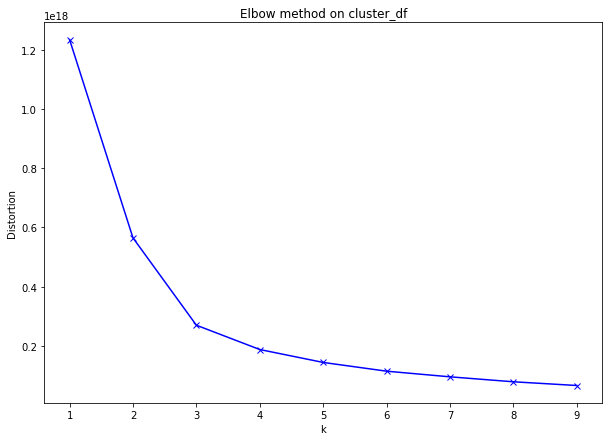

In [14]:
distortions = []

K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(model_features)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(10,7))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow method on cluster_df')

Given the dataset, the elbow method suggests 2-3 groups, but due to our models we want to use, we will select 2.

In [15]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(model_features)
model_features['successful_trend'] = kmeans.labels_

In [16]:
# Filter variables for our model
model_features = model_features[['views_per_date', 'categoryId', 'view_count', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled','time_to_trend', 'no_description', 'num_trending', 'successful_trend']]

In [17]:
model_features.head()

,views_per_date,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,time_to_trend,no_description,num_trending,successful_trend
0,9140911.000000000000,10.000000000000,9140911.000000000000,296541.000000000000,6180.000000000000,30059.000000000000,0,0,1.000000000000,0.000000000000,18.000000000000,0
1,2038853.000000000000,24.000000000000,2038853.000000000000,353797.000000000000,2628.000000000000,40222.000000000000,0,0,1.000000000000,0.000000000000,11.000000000000,0
2,2381688.000000000000,20.000000000000,2381688.000000000000,146740.000000000000,2794.000000000000,16549.000000000000,0,0,1.000000000000,0.000000000000,54.000000000000,0
3,1514614.000000000000,22.000000000000,1514614.000000000000,156914.000000000000,5857.000000000000,35331.000000000000,0,0,1.000000000000,0.000000000000,12.000000000000,0
4,1123889.000000000000,26.000000000000,1123889.000000000000,45803.000000000000,964.000000000000,2198.000000000000,0,0,1.000000000000,0.000000000000,11.000000000000,0


In [18]:
# Change type to int
model_features[['categoryId', 'view_count', 'views_per_date', 'likes', 'dislikes', 'comment_count', 'time_to_trend', 'no_description', 'num_trending']] = model_features[['categoryId', 'view_count', 'views_per_date', 'likes', 'dislikes', 'comment_count', 'time_to_trend', 'no_description', 'num_trending']] = model_features[['categoryId', 'view_count', 'views_per_date', 'likes', 'dislikes', 'comment_count', 'time_to_trend', 'no_description', 'num_trending']] = model_features[['categoryId', 'view_count', 'views_per_date', 'likes', 'dislikes', 'comment_count', 'time_to_trend', 'no_description', 'num_trending']].astype('int')
model_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21153 entries, 0 to 688852
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   views_per_date     21153 non-null  int64
 1   categoryId         21153 non-null  int64
 2   view_count         21153 non-null  int64
 3   likes              21153 non-null  int64
 4   dislikes           21153 non-null  int64
 5   comment_count      21153 non-null  int64
 6   comments_disabled  21153 non-null  int8 
 7   ratings_disabled   21153 non-null  int8 
 8   time_to_trend      21153 non-null  int64
 9   no_description     21153 non-null  int64
 10  num_trending       21153 non-null  int64
 11  successful_trend   21153 non-null  int32
dtypes: int32(1), int64(9), int8(2)
memory usage: 1.7 MB


### Baseline Model: Linear Regression w/o parameter tuning

#### Note

- Linear Regression is used for continuous dependant variables. In our situation, we are going to analyze trending vidoes by how many views they got per day. This gives us a better indicator of whather they were actually 'trending' and doesn't equate videos that were trending for one week vs. one day.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
X = np.array(model_features.loc[:, model_features.columns != 'views_per_date'])
y = np.array(model_features.loc[:, model_features.columns == 'views_per_date']).reshape(-1, 1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [28]:
model_predict = model.predict(X_test)

array([[-142144.13860621],
       [ 504129.14395339],
       [1005221.73982766],
       ...,
       [1006512.02432393],
       [ 972878.09564   ],
       [ 799632.57220653]])

In [30]:
#Sample of our predictions
pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': list(model_predict.flatten())}).head()

,Actual,Predicted
0,41748,-142144.138606210006
1,265913,504129.143953389430
2,886076,1005221.739827656187
3,830181,1011445.700921416865
4,123063,434916.112909295713
...,...,...
4226,342236,466341.013563071261
4227,924406,762360.807613329496
4228,692144,1006512.024323929567
4229,988769,972878.095640003914


#### Using RMSE & Normalised RMSE as our metric of error

In [36]:
rmse = sqrt(mean_squared_error(y_test, model_predict))
n_rmse = sqrt(mean_squared_error(y_test, model_predict)) / (y_test.max() - y_test.min())
print('The RMSE for this model is ', rmse)
print('The Normalised RMSE for this model is ', n_rmse)

The RMSE for this model is  1215803.7679173807
The Normalised RMSE for this model is  0.03659469144800184


In [32]:
feature_importance = model.coef_
feature_importance

array([[-5.47643417e+03,  1.22542687e-01,  1.30859216e+00,
        -2.05698162e+00,  2.60752394e+00,  5.21358527e+05,
        -1.12049747e-09, -1.83525802e+05,  2.26276862e+05,
         6.67468160e+03,  4.30846815e+06]])

In [37]:
model_features.columns

Index(['views_per_date', 'categoryId', 'view_count', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled',
       'time_to_trend', 'no_description', 'num_trending', 'successful_trend'],
      dtype='object')